<a href="https://colab.research.google.com/github/JeromeMberia/FinAccess_household_survey/blob/main/FinAccess_household_survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Figuring out how we can predict which individuals are most likely to have or use a bank account.

### b) Defining the Metric for Success



> It will be successfull when  we can predict which individuals are most likely to have or use a bank account.



### c) Understanding the context 



> place it here



### d) Recording the Experimental Design

> Step carried out:
>
> * Load the dataset
>
> * preview 
>
> * Check the dataset
>
> * Tidying the Dataset
>
> * Exploratory Analysis
>  * univariate, 
>  * bivariate 
>  * multivariate
>
> * Challenging the Solution
> * Follow Up Questions





### e) Data Relevance



> place it here



## Reading the Data

In [646]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [647]:
# Loading the Data from the source i.e. csv
# 
df = pd.read_csv('Financial Dataset - 1.csv')

## Checking the Data

In [648]:
# Determining the no. of records in our dataset
#
df.shape

(23524, 13)

In [649]:
# Previewing the top of our dataset
#
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [650]:
# Previewing the bottom of our dataset
#
df.tail() 

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [651]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [652]:
#Checking how many unique value are in a column
df.nunique()

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64

In [653]:
# 1
df['country'].unique()

array(['Kenya', 'Rwanda', 'Tanzania', nan, 'Uganda'], dtype=object)

In [654]:
# 2
df['year'].unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

In [655]:
# 3
df['uniqueid'].unique()

array(['uniqueid_1', 'uniqueid_2', 'uniqueid_3', ..., 'uniqueid_8757',
       'uniqueid_8758', 'uniqueid_8759'], dtype=object)

In [656]:
# 4
df['Has a Bank account'].unique()

array(['Yes', 'No', nan], dtype=object)

In [657]:
# 5
df['Type of Location'].unique()

array(['Rural', 'Urban', nan], dtype=object)

In [658]:
# 6
df['Cell Phone Access'].unique()

array(['Yes', 'No', nan], dtype=object)

In [659]:
# 7
df['household_size'].unique()

array([ 3.,  5.,  8.,  7.,  1.,  6.,  4., 10.,  2., 11.,  9., 12., 16.,
       15., 13., 14., 21., nan,  0., 18., 17., 20.])

In [660]:
# 8
df['Respondent Age'].unique()

array([ 24.,  70.,  26.,  34.,  32.,  42.,  54.,  76.,  40.,  69.,  64.,
        31.,  38.,  47.,  27.,  48.,  25.,  21.,  18.,  22.,  58.,  55.,
        62.,  29.,  35.,  45.,  67.,  19.,  80.,  66.,  50.,  33.,  28.,
        51.,  16.,  17.,  30.,  37.,  59.,  65.,  46.,  56.,  52.,  23.,
        43.,  49.,  44.,  72.,  53.,  63.,  39.,  81.,  78.,  36.,  20.,
        60.,  95.,  71.,  57.,  85.,  68.,  41.,  61.,  75.,  86.,  73.,
        nan,  93.,  74.,  88.,  90.,  77.,  84.,  82.,  89.,  79.,  83.,
        94.,  87.,  92.,  91.,  98.,  97.,  96.,  99., 100.])

In [661]:
# 9
df['gender_of_respondent'].unique()

array(['Female', 'Male', nan], dtype=object)

In [662]:
# 10
df['The relathip with head'].unique()

array(['Spouse', 'Head of Household', 'Other relative', 'Child', 'Parent',
       'Other non-relatives', nan], dtype=object)

In [663]:
# 11
df['marital_status'].unique()

array(['Married/Living together', 'Widowed', 'Single/Never Married',
       'Divorced/Seperated', 'Dont know', nan], dtype=object)

In [664]:
# 12
df['Level of Educuation'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', '6', nan],
      dtype=object)

In [665]:
# 13
df['Type of Job'].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', nan, 'No Income'], dtype=object)

In [666]:
df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [667]:
df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [668]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


## Tidying the Dataset

In [669]:
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [670]:
df = df[df['year']<=2018]

In [671]:
df['year'].unique()

array([2018, 2016, 2017])

In [672]:
df = df.rename(columns={'Has a Bank account':'has_a_bank_account', 
                   'Type of Location':'location_type',
                   'Cell Phone Access':'cellphone_access',  
                   'Respondent Age':'age_of_respondent',
                   'The relathip with head':'relationship_with_head', 
                   'Level of Educuation':'education_level', 
                   'Type of Job':'job_type'})
df.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [673]:
df.duplicated().sum()

0

In [674]:
df['education_level'] = df['education_level'].replace(['6'], np.nan) 

In [675]:
df['education_level'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', nan], dtype=object)

In [676]:
print(df['household_size'].min())
df.drop(df[df['household_size'] == 0].index, inplace = True)
print(df['household_size'].min())

0.0
1.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


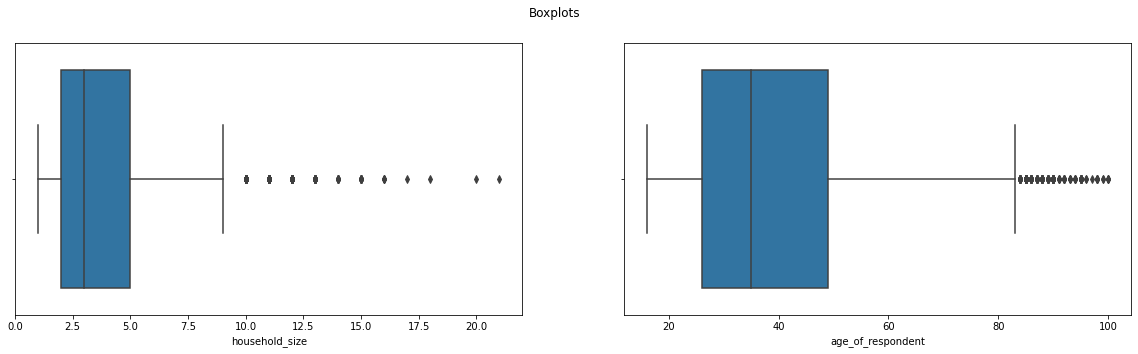

In [677]:
# Checking for Outliers
#
fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(20, 5))
fig.suptitle('Boxplots')
sns.boxplot(df['household_size'], ax=ax1)
sns.boxplot(df['age_of_respondent'], ax=ax2)
plt.show()

In [678]:
# removing outliers
max_thresold_h_s = df['household_size'].quantile(0.95)
max_thresold_a_o_r = df['age_of_respondent'].quantile(0.95)

min_thresold_h_s = df['household_size'].quantile(0.05)
min_thresold_a_o_r = df['age_of_respondent'].quantile(0.05)

df = df[(df['household_size']<max_thresold_h_s) & (df['household_size']>min_thresold_h_s)]
df = df[(df['age_of_respondent']<max_thresold_a_o_r) & (df['age_of_respondent']>min_thresold_a_o_r)]

In [679]:
# Checking for Anomalies
#
household_size_Q1 = df['household_size'].quantile(.25)
household_size_Q3 = df['household_size'].quantile(.75)

iqr_h_s = household_size_Q3 - household_size_Q1


age_of_respondent_Q1 = df['age_of_respondent'].quantile(.25)
age_of_respondent_Q3 = df['age_of_respondent'].quantile(.75)

iqr_a_o_r = age_of_respondent_Q3 - age_of_respondent_Q1

print(f'The interquartile range of household_size is {iqr_h_s}.')
print(f'The interquartile range of age_of_respondent is {iqr_a_o_r}.')

The interquartile range of household_size is 3.0.
The interquartile range of age_of_respondent is 19.0.


In [680]:
# Identifying the Missing Data
#
df.isnull().sum()

country                    7
year                       0
uniqueid                   0
has_a_bank_account        23
location_type              9
cellphone_access           7
household_size             0
age_of_respondent          0
gender_of_respondent      14
relationship_with_head     0
marital_status            19
education_level           38
job_type                  22
dtype: int64

In [681]:
df.dropna()

,country,year,uniqueid,has_a_bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
5,Kenya,2018,uniqueid_6,No,Rural,No,7.0,26.0,Female,Spouse,Married/Living together,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23512,Uganda,2018,uniqueid_2102,No,Rural,No,2.0,57.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income


In [682]:
df['country'] = df['country'].astype(str)
df['country'] = df['country'].str.strip()
df['year'] = df['year'].astype(int)
df['uniqueid'] = df['uniqueid'].astype(str)
df['uniqueid'] = df['uniqueid'].str.strip()
df['has_a_bank_account'] = df['has_a_bank_account'].astype(str)
df['has_a_bank_account'] = df['has_a_bank_account'].str.strip()
df['location_type'] = df['location_type'].astype(str)
df['location_type'] = df['location_type'].str.strip()
df['cellphone_access'] = df['cellphone_access'].astype(str)
df['cellphone_access'] = df['cellphone_access'].str.strip()
df['household_size'] = df['household_size'].astype(int)
df['age_of_respondent'] = df['age_of_respondent'].astype(int)
df['gender_of_respondent'] = df['gender_of_respondent'].astype(str)
df['gender_of_respondent'] = df['gender_of_respondent'].str.strip()
df['relationship_with_head'] = df['relationship_with_head'].astype(str)
df['relationship_with_head'] = df['relationship_with_head'].str.strip()
df['marital_status'] = df['marital_status'].astype(str)
df['marital_status'] = df['marital_status'].str.strip()
df['education_level'] = df['education_level'].astype(str)
df['education_level'] = df['education_level'].str.strip()
df['job_type'] = df['job_type'].astype(str)
df['job_type'] = df['job_type'].str.strip()

In [683]:
df.head()

,country,year,uniqueid,has_a_bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
5,Kenya,2018,uniqueid_6,No,Rural,No,7,26,Female,Spouse,Married/Living together,Primary education,Informally employed


## Exploratory Analysis

### Univariate Analysis

In [ ]:
df.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

ValueError: ignored

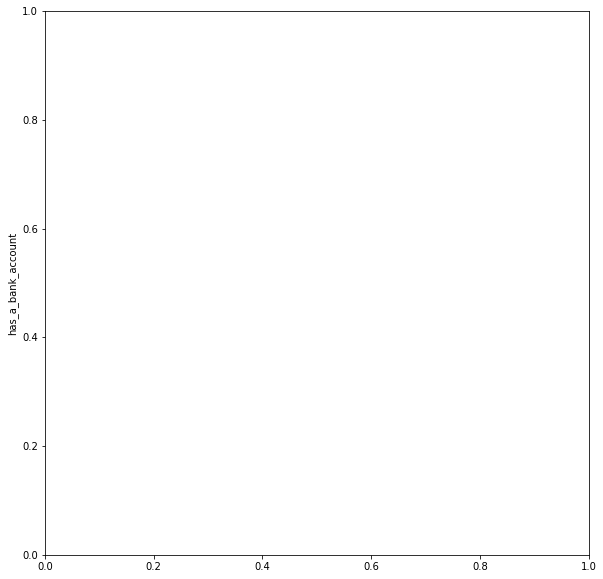

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(20,10))
colors = ['red', 'blue']
df['has_a_bank_account'].value_counts().plot.pie(explode=[0,0.1],
                                                 colors=colors, 
                                                 autopct='%1.4f%%',
                                                 ax=ax,
                                                 shadow=True)
ax.set_title('Pecentage of people how have and don\'t have a bank account', )
plt.show()

#### Central Tendency

##### mean

In [ ]:
# the mean of people in house in each country
df_c = df.groupby('country')
df_c['household_size'].mean()

##### median

In [ ]:
# the median of Number of people living in one house 
df['household_size'].median()

In [ ]:
# the median of Number of people living in one house
df['age_of_respondent'].median()

##### mode

In [ ]:
df['age_of_respondent'].mode()

In [ ]:
df['household_size'].mode()

####Dispersion

##### Standard Deviation

In [ ]:
df['household_size'].std()

##### Variance

In [ ]:
df['household_size'].var()

##### Range

In [ ]:
max = df['household_size'].max()
min = df['household_size'].min()
range = max-min
range

##### Quantiles

In [ ]:
df['household_size'].quantile([0.25,0.5,0.75])

##### Summary statistics

In [ ]:
df['household_size'].describe()

#### Descriptions of the distribution curve

##### Skewness

In [ ]:
df['household_size'].skew()

##### Kurtosis

In [ ]:
df['household_size'].kurt()

### Bivariate Analysis

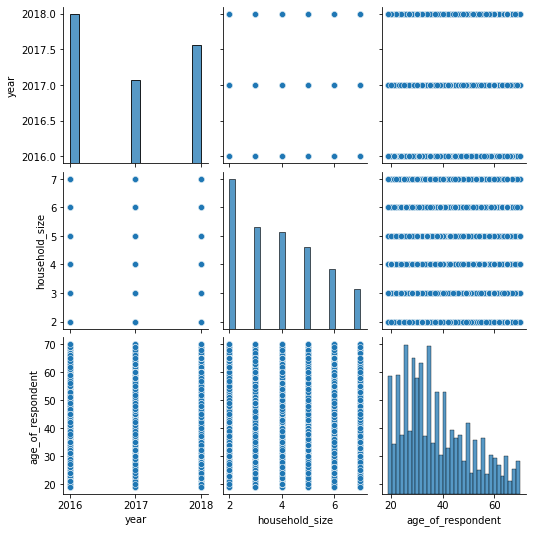

In [637]:
sns.pairplot(df)
plt.show()

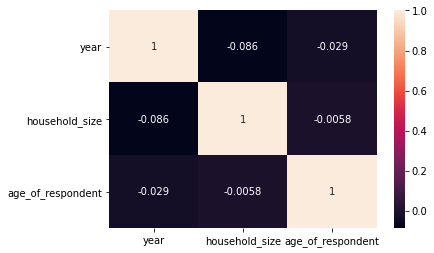

In [638]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [639]:
df['age_of_respondent'].corr(df['household_size']) 

-0.0057785316314004085

### Multivariate

#### Principal Component Analysis

In [ ]:
df.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [594]:
label_encoder = LabelEncoder()

#transform to integer
df['location_type'] = label_encoder.fit_transform(df['location_type'])
df['cellphone_access'] = label_encoder.fit_transform(df['cellphone_access'])
df['household_size'] = label_encoder.fit_transform(df['household_size'])
df['age_of_respondent'] = label_encoder.fit_transform(df['age_of_respondent'])
df['relationship_with_head'] = label_encoder.fit_transform(df['relationship_with_head'])
df['education_level'] = label_encoder.fit_transform(df['education_level'])
df['job_type'] = label_encoder.fit_transform(df['job_type'])
df['marital_status'] = label_encoder.fit_transform(df['marital_status'])
df['gender_of_respondent'] = label_encoder.fit_transform(df['gender_of_respondent'])

In [595]:
df = df.drop(["country", "year", "uniqueid", "job_type",], axis=1)

In [ ]:
df.head()

,has_a_bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level
0,Yes,0,1,1,5,0,5,2,3
1,No,0,0,3,51,0,1,4,0
2,Yes,1,1,3,7,1,3,3,5
3,No,0,1,3,15,0,1,2,2
5,No,0,0,5,7,0,5,2,2


In [ ]:
x = df.drop('has_a_bank_account', 1)
y = df['has_a_bank_account']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.20431299, 0.18507809, 0.17820571, 0.11622416, 0.09821829,
       0.08850995, 0.07859194, 0.05085887])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[2713    0    0]
 [ 482    0    0]
 [   4    0    0]]
Accuracy 0.8480775242263208


#### Discriminant Analysis

In [684]:
label_encoder = LabelEncoder()

#transform to integer
df['location_type'] = label_encoder.fit_transform(df['location_type'])
df['cellphone_access'] = label_encoder.fit_transform(df['cellphone_access'])
df['household_size'] = label_encoder.fit_transform(df['household_size'])
df['age_of_respondent'] = label_encoder.fit_transform(df['age_of_respondent'])
df['relationship_with_head'] = label_encoder.fit_transform(df['relationship_with_head'])
df['education_level'] = label_encoder.fit_transform(df['education_level'])
df['job_type'] = label_encoder.fit_transform(df['job_type'])
df['marital_status'] = label_encoder.fit_transform(df['marital_status'])
df['gender_of_respondent'] = label_encoder.fit_transform(df['gender_of_respondent'])

In [685]:
df = df.drop(["country", "year", "uniqueid", "job_type",], axis=1)

In [686]:
df.head()

,has_a_bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level
0,Yes,0,1,1,5,0,5,2,3
1,No,0,0,3,51,0,1,4,0
2,Yes,1,1,3,7,1,3,3,5
3,No,0,1,3,15,0,1,2,2
5,No,0,0,5,7,0,5,2,2


In [687]:
x = df.drop('has_a_bank_account', 1)
y = df['has_a_bank_account']

In [688]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [689]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [690]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [691]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [692]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[2604  109    0]
 [ 319  163    0]
 [   4    0    0]]
Accuracy0.8649577993122851


## Follow up questions

### a). Did we have the right data?

> Yes, the set data was extracted from various Finscope surveys ranging from 2016 to 2018 beside it having some extra years.

### b). Do we need other data to answer our question?

> just for latest year to get a better prediction.